In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import smelly_rats

# Loading the data

In [3]:
xl = pd.ExcelFile('../data/onions.xls')

## HNMR spectra

In [4]:
hnmr_spectra = (
    pd.read_excel(xl, sheet_name=0, index_col=0)
    .rename(columns=lambda col: col.replace("'", ""))
)
print('HNMR spectra shape:', hnmr_spectra.shape)
hnmr_spectra.head()

HNMR spectra shape: (29001, 31)


,H2-12-,H4-31,H4-26,H3-22,H3-18,H1-4-,H3-23,H2-13,H3-21,H2-15,...,H1-1-,H1-2-,H1-5-,H2-14,H4-32,H1-8-,H4-30-,H1-7-,H4-27,H4-29
Delta/sample,,,,,,,,,,,,,,,,,,,,,
9.610344,-28.513780,-52.448327,-23.500000,-26.544199,-55.279156,-35.207816,-35.930118,-27.230263,-145.015509,-38.582873,...,-21.653880,-45.941569,-24.025647,-65.961914,-11.878906,-58.418860,-31.238004,-13.412983,10.911186,-6.325170
9.610039,-28.954232,-49.399606,-21.960938,-25.386740,-58.067618,-37.955955,-36.678150,-31.828947,-145.539702,-36.204420,...,-22.597545,-38.016119,-26.693336,-63.416992,-5.317383,-58.347588,-28.809363,-16.131906,14.418928,-5.288283
9.609733,-31.200787,-48.361220,-21.128906,-23.991713,-61.355459,-40.201613,-37.549213,-34.278509,-147.047146,-33.707182,...,-25.307979,-30.963267,-31.000658,-60.100586,-8.684570,-56.780702,-26.809793,-20.126381,16.627523,-2.619343
9.609427,-34.542323,-49.719488,-20.882812,-22.911602,-65.296216,-41.370968,-38.390748,-35.140351,-149.435484,-30.776243,...,-29.772578,-26.112833,-35.842832,-57.005859,-10.528320,-54.250000,-25.505659,-23.735497,17.504784,1.188779
9.609122,-37.760827,-52.706693,-21.105469,-22.190608,-69.508375,-41.253102,-39.424213,-35.083333,-152.924938,-27.527624,...,-35.337023,-24.266894,-40.272907,-54.113281,-5.323242,-51.385965,-24.713337,-26.269337,17.766614,4.713267


**Spectra range**

In [5]:
print('Spectra is ranging from (ppm)')
hnmr_spectra.index.min(), hnmr_spectra.index.max()

Spectra is ranging from (ppm)


(0.320748109179809, 9.6103440807294)

As set in the paper the values of the spectra between 5 and 4.50 ppm are removed. Approximately, it is actually `5.027118` to `4.598711`.

In [6]:
hnmr_spectra[5.03:5]

,H2-12-,H4-31,H4-26,H3-22,H3-18,H1-4-,H3-23,H2-13,H3-21,H2-15,...,H1-1-,H1-2-,H1-5-,H2-14,H4-32,H1-8-,H4-30-,H1-7-,H4-27,H4-29
Delta/sample,,,,,,,,,,,,,,,,,,,,,
5.029868,-28.607283,-29.392224,-104.519531,21.281768,129.288151,-42.090571,-59.052657,332.655702,-6.678040,-24.270718,...,115.081105,11.122133,-19.310609,8.721680,71.306641,-9.457237,53.698019,-8.455801,154.432846,-41.802542
5.029563,-24.217520,-31.948819,-109.285156,21.408840,121.211228,-42.019231,-62.283465,334.353070,-8.746898,-21.433702,...,114.094695,5.452573,-21.352477,7.622070,79.133789,-9.976974,52.588275,-15.752072,154.813848,-45.030998
5.029257,-20.386319,-34.205217,-115.257812,22.964088,114.334677,-41.132134,-64.318406,334.982456,-10.440447,-18.850829,...,113.036497,-0.887322,-23.933582,6.659180,105.103516,-9.421053,51.403482,-24.026934,154.239736,-47.659640
5.028952,-17.485236,-36.131890,-120.519531,25.897790,109.851117,-39.962779,-66.168799,335.015351,-12.344913,-17.527624,...,111.982135,-6.808741,-26.430294,5.496094,126.507812,-8.739035,50.311577,-32.520028,152.836204,-49.502480
5.028646,-15.585630,-37.748524,-123.343750,30.165746,107.790012,-39.302109,-68.329232,335.010965,-15.006203,-17.511050,...,110.976545,-10.763329,-28.522578,4.022461,115.649414,-9.285088,49.355930,-40.609116,150.991649,-50.782703
5.028340,-14.109252,-39.190453,-123.511719,35.488950,107.028536,-39.559553,-70.922736,335.234649,-18.532878,-18.350829,...,109.944103,-11.574706,-30.139193,2.271484,84.955078,-11.646930,47.961061,-47.517265,149.159273,-51.819591
5.028035,-12.194882,-40.883366,-121.996094,41.425414,106.350806,-40.431141,-74.000984,335.651316,-22.794665,-19.812155,...,108.696295,-9.020459,-31.039018,0.534180,69.589844,-15.376096,45.189776,-52.392956,147.579593,-52.797582
5.027729,-9.571850,-43.307087,-119.750000,47.372928,105.448201,-41.253102,-77.655020,336.445175,-27.664392,-21.895028,...,107.130096,-3.909640,-30.735423,-0.535156,75.322266,-19.718202,40.605930,-54.813536,146.161708,-53.766274
5.027424,-6.958661,-46.528051,-117.210938,52.422652,104.820099,-41.553970,-81.847933,338.201754,-32.912531,-24.262431,...,105.385796,2.260539,-28.985094,-0.200195,78.292969,-24.164474,34.813915,-55.113950,144.683368,-54.609423


In [7]:
hnmr_spectra[5:4.5]

,H2-12-,H4-31,H4-26,H3-22,H3-18,H1-4-,H3-23,H2-13,H3-21,H2-15,...,H1-1-,H1-2-,H1-5-,H2-14,H4-32,H1-8-,H4-30-,H1-7-,H4-27,H4-29
Delta/sample,,,,,,,,,,,,,,,,,,,,,
4.598711,137.913386,272.704232,387.460938,452.008287,448.439826,113.194789,165.693898,519.701754,1.014268,6.936464,...,376.867054,216.291847,340.347435,226.961914,92.274414,216.434211,377.395731,317.725138,211.881089,54.203348
4.598405,138.631890,268.518701,384.699219,449.911602,438.528226,111.380273,164.758858,520.660088,-1.417494,7.646409,...,378.558746,218.926689,333.888645,228.265625,72.339844,223.162281,369.425135,317.624309,212.780532,54.349039
4.598100,138.292323,264.589075,380.757812,449.154696,429.036911,110.877792,163.976378,521.234649,-3.681762,10.820442,...,381.621000,222.097799,327.664402,229.337891,68.016602,229.299342,364.057579,317.392956,213.843946,54.077805
4.597794,136.975886,261.144193,376.238281,450.176796,420.274504,111.411290,163.705709,521.695175,-4.956576,15.803867,...,385.432924,225.953968,321.800745,229.927734,74.285156,235.550439,360.707124,316.676105,215.161360,53.135462
4.597489,135.396161,258.004429,372.617188,453.428177,412.217742,112.583747,164.084646,521.969298,-4.584367,22.055249,...,388.883165,230.049597,316.334941,229.879883,57.078125,242.689693,358.556533,315.274862,216.826722,51.630502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.501234,169.726870,376.134350,461.660156,728.886740,620.550558,192.106079,243.491634,551.600877,110.890199,224.298343,...,598.456269,539.393986,476.321789,239.622070,140.396484,840.686404,467.954909,440.830110,155.115692,229.375387
4.500929,171.860236,377.632874,470.160156,735.925414,630.919665,197.133995,247.960138,561.513158,117.112283,229.613260,...,610.765015,549.384687,484.227313,248.915039,143.981445,857.701754,478.781373,450.517956,156.788013,229.367638
4.500623,173.848425,380.238681,479.214844,744.292818,642.295285,201.755583,254.478346,570.877193,123.740695,234.574586,...,621.986519,561.477061,491.496054,258.530273,155.209961,874.953947,488.922552,460.446133,158.812196,229.324241


**Columns**

In [8]:
print(f'There are {len(hnmr_spectra.columns)} columns')
hnmr_spectra.columns

There are 31 columns


Index(['H2-12-', 'H4-31', 'H4-26', 'H3-22', 'H3-18', 'H1-4-', 'H3-23', 'H2-13',
       'H3-21', 'H2-15', 'H3-19', 'H2-10', 'H1-3-', 'H3-24', 'H4-28', 'H2-16',
       'H4-28.1', 'H2-11', 'H3-17', 'H2-9-', 'H1-6-', 'H1-1-', 'H1-2-',
       'H1-5-', 'H2-14', 'H4-32', 'H1-8-', 'H4-30-', 'H1-7-', 'H4-27',
       'H4-29'],
      dtype='object')

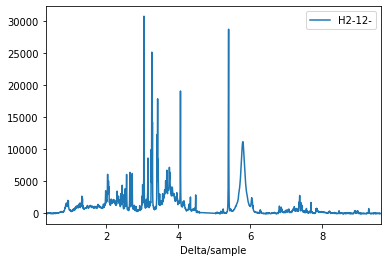

In [9]:
hnmr_spectra.plot(y='H2-12-')

**The following columns are duplicates, but the values (of the column) are not duplicates.**

In [10]:
double_columns = [col for col in hnmr_spectra.columns if col.startswith("H4-28")]
print(double_columns)
# [list(hnmr_spectra.columns).index(c) for c in double_columns]
hnmr_spectra[double_columns]

['H4-28', 'H4-28.1']


,H4-28,H4-28.1
Delta/sample,,
9.610344,-3.829102,-10.070521
9.610039,-8.428711,-8.773249
9.609733,-12.470703,-8.068041
9.609427,-15.474609,-8.623683
9.609122,-17.094727,-10.445598
...,...,...
0.321970,-14.287109,-17.670490
0.321665,-18.733398,-19.710167
0.321359,-24.204102,-22.131897


**Column groups**

In [11]:
from pprint import pprint
groups = (1, 2, 3, 4)
group_cols = {
    group: [c for c in hnmr_spectra.columns if c.startswith(f'H{group}')]
    for group in groups
}
pprint(group_cols)

{1: ['H1-4-', 'H1-3-', 'H1-6-', 'H1-1-', 'H1-2-', 'H1-5-', 'H1-8-', 'H1-7-'],
 2: ['H2-12-', 'H2-13', 'H2-15', 'H2-10', 'H2-16', 'H2-11', 'H2-9-', 'H2-14'],
 3: ['H3-22', 'H3-18', 'H3-23', 'H3-21', 'H3-19', 'H3-24', 'H3-17'],
 4: ['H4-31', 'H4-26', 'H4-28', 'H4-28.1', 'H4-32', 'H4-30-', 'H4-27', 'H4-29']}


Reproducing fig 2 of paper

No handles with labels found to put in legend.


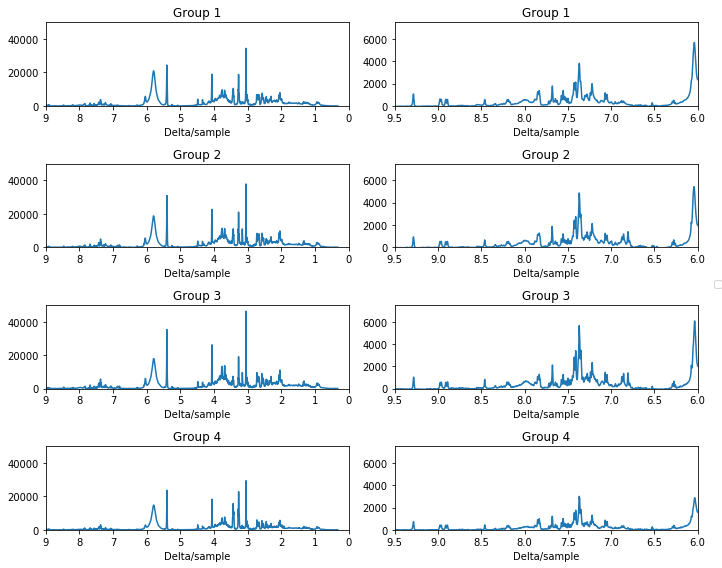

In [12]:
fig, axes = plt.subplots(len(groups), 2, figsize=(10, 8))

for idx, group in enumerate(groups):
    ax = axes[idx, 0]
    hnmr_spectra[group_cols[group]].mean(axis=1).plot(ax=ax, label='')
    ax.set_ylim([0, 50_000])
    ax.set_xlim([9, 0])
    ax.set_title(f'Group {group}')
    
    ax = axes[idx, 1]
    hnmr_spectra[group_cols[group]].mean(axis=1).plot(ax=ax, label='')
    ax.set_title(f'Group {group}')
    ax.set_ylim([0, 7500])
    ax.set_xlim([9.5, 6])
    
fig.legend(loc="center right", borderaxespad=0.1)
fig.tight_layout()

## Loading the target (i.e. onion% groups)

In [13]:
target = pd.read_excel(xl, sheet_name=1, usecols=range(10, 15))
print(target.shape)
target.head()

(31, 5)


,y,y0,y3,y7,y10
0,10,0,0,0,1
1,3,0,1,0,0
2,3,0,1,0,0
3,7,0,0,1,0
4,7,0,0,1,0


# Pareto scaling

In [16]:
from smelly_rats import preproccessing

In [40]:
hnmr_spectra_scaled = (
    hnmr_spectra
    .apply(preproccessing.pareto_scaling)
)

No handles with labels found to put in legend.


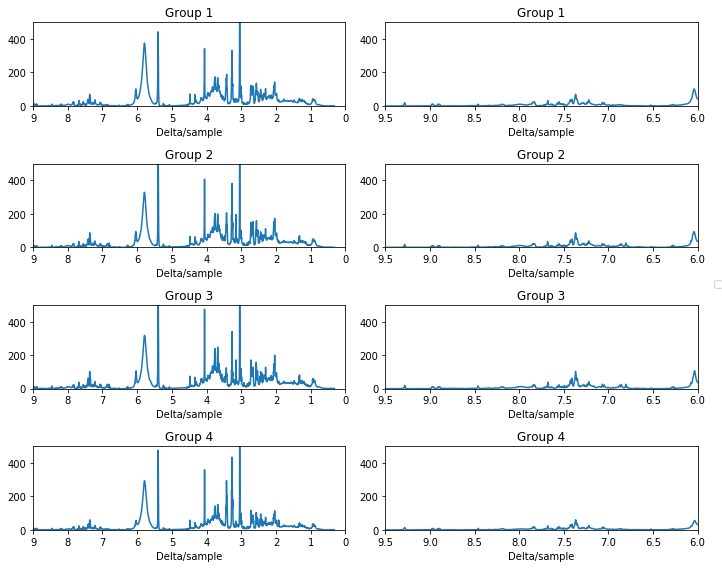

In [42]:
fig, axes = plt.subplots(len(groups), 2, figsize=(10, 8))

for idx, group in enumerate(groups):
    ax = axes[idx, 0]
    hnmr_spectra_scaled[group_cols[group]].mean(axis=1).plot(ax=ax, label='')
    ax.set_ylim([0, 500])
    ax.set_xlim([9, 0])
    ax.set_title(f'Group {group}')
    
    ax = axes[idx, 1]
    hnmr_spectra_scaled[group_cols[group]].mean(axis=1).plot(ax=ax, label='')
    ax.set_title(f'Group {group}')
    ax.set_ylim([0, 500])
    ax.set_xlim([9.5, 6])
    
fig.legend(loc="center right", borderaxespad=0.1)
fig.tight_layout()

# Applying different dimentionality reduction techniques

In [66]:
import numpy as np
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.decomposition import PCA

/Users/cor/github/rats-and-onions/venv/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/cor/github/rats-and-onions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
/Users/cor/github/rats-and-onions/venv/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/cor/github/rats-and-onions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.


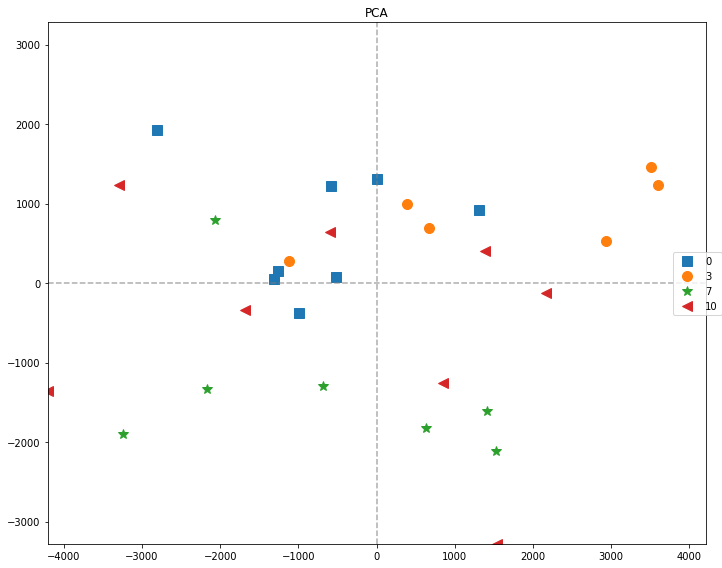

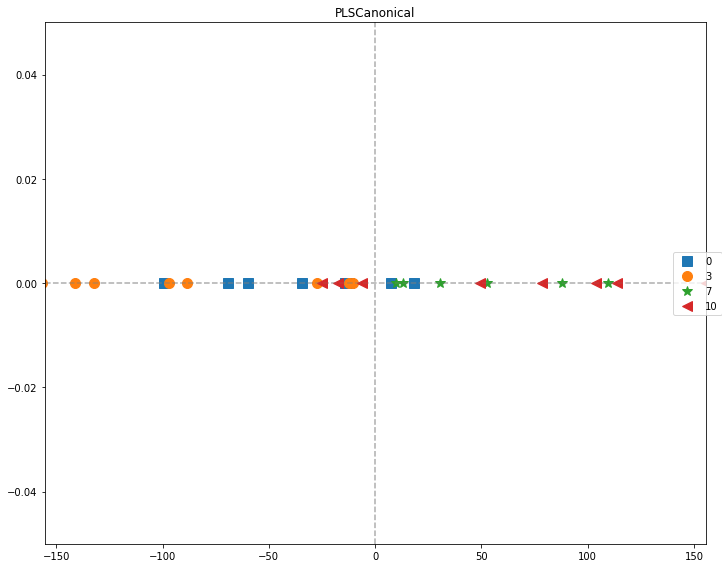

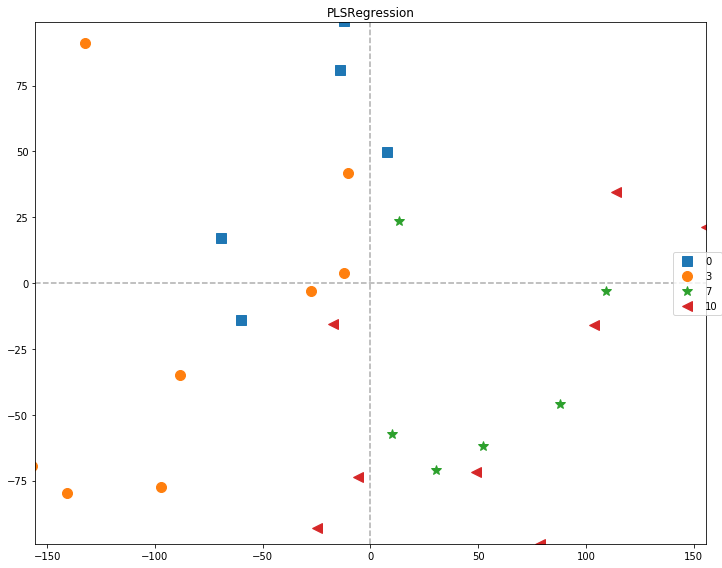

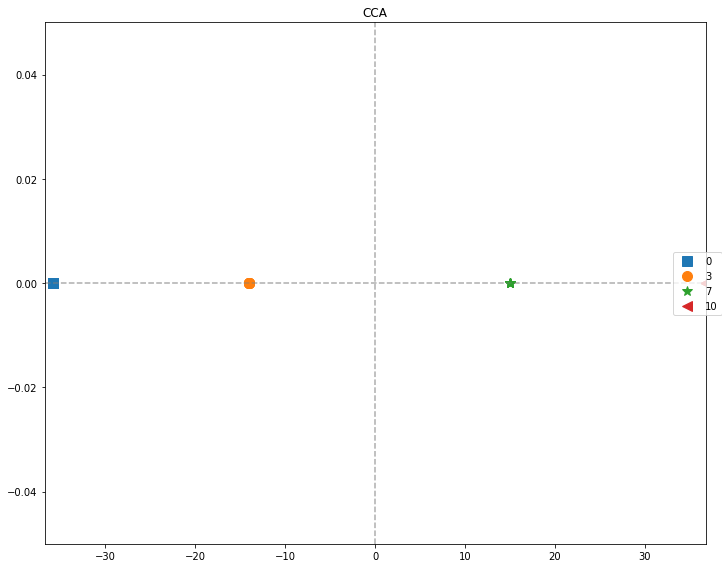

In [163]:
for reducer in PCA, PLSCanonical, PLSRegression, CCA:
    red = reducer(n_components=2)
    transformed = red.fit_transform(hnmr_spectra_scaled.T, target['y'])
    try: 
        hnmr_spectra_reduced, _ = transformed
    except ValueError:
        hnmr_spectra_reduced = transformed

    fig, ax = plt.subplots(figsize=(10, 8))

    symbols = ['s', 'o', '*', '<']
    for idx, cat in enumerate(sorted(target['y'].unique())):
        mask = target['y'] == cat
        x_values = hnmr_spectra_reduced[mask, 0]
        y_values = hnmr_spectra_reduced[mask, 1]
        ax.plot(x_values, y_values, symbols[idx], label=cat, ms=10)

        ax.axhline(0, linestyle='--', color='gray', alpha=0.2)
        ax.axvline(0, linestyle='--', color='gray', alpha=0.2)

        x_max = np.abs(x_values).max()
        ax.set_xlim([-x_max, x_max])
        y_max = np.abs(y_values).max()
        ax.set_ylim([-y_max, y_max])
        
    ax.set_title(reducer.__name__)
    fig.legend(loc="center right", borderaxespad=0.1)
    fig.tight_layout()

# Classification on reduced data

Only using the 2 components here. (Will probably not be accurate judging from the figures above.)

In [166]:
red = PCA(n_components=2)
hnmr_spectra_reduced = red.fit_transform(hnmr_spectra_scaled.T, target['y'])

In [167]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

reg = linear_model.Lasso(alpha=0.1)

scores = cross_val_score(
    reg, 
    hnmr_spectra_reduced,
    target['y'], 
    cv=5
)
scores

array([ 0.29079571, -0.02162755, -0.66699834, -0.23221208, -2.39416967])

In [168]:
from sklearn.linear_model import LogisticRegression



reg = LogisticRegression(
    penalty='l1', 
    solver='saga', 
    multi_class='multinomial', 
    C=1e-10, 
#     max_iter=1000
)

scores = cross_val_score(
    reg, 
    hnmr_spectra_reduced, 
    target['y'], 
    cv=5
)
scores

array([0.25      , 0.25      , 0.28571429, 0.25      , 0.25      ])

**Only convergence for small `C`**

In [169]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-10, -6, num=5)
}

mod = GridSearchCV(
    reg,
    param_grid,
    cv=5,
    return_train_score=True,
    iid=False,
)

mod.fit(hnmr_spectra_reduced, target['y'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1e-10, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)